# Setting up enviroments requirements
If you want to run this Jupyter Notebook on Google colab, clieck on the next hyperlink: [Load on Google Colab.](https://githubtocolab.com/mjacker/MJCapstone/blob/develop/0_merged_ipynb_files_for_google_colab.ipynb)

If you want to load the Jypyter Notebook locally then clone the github repository on [Github Repository](https://github.com/mjacker/MJCapstone/tree/develop) by yourself and prepare a venv python enviroment to install the requirements dependencies.

Uncomment the next block to install dependencies.


## Venv python enviroment 

In [1]:
# !python -m pip install requirements.yml -y

## Downloading the Dataset
Downloading on Google colab. (By default)

In [2]:
# on linux
!apt-get install awscli
!python -m pip install requests==2.28.2
!mkdir datasets
!aws s3 ls --no-sign-request --region ap-northeast-3 "s3://cse-cic-ids2018/" --recursive --human-readable
!aws s3 cp --no-sign-request --region ap-northeast-3 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv" "./datasets/"
!aws s3 cp --no-sign-request --region ap-northeast-3 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv" "./datasets/"


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


     ---------------------------------------- 0.0/62.8 kB ? eta -:--:--
     ------------------------ ------------- 41.0/62.8 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  61.4/62.8 kB 825.8 kB/s eta 0:00:01
     -------------------------------------- 62.8/62.8 kB 674.1 kB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.25.2 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
A subdirectory or file datasets already exists.
'aws' is not recognized as an internal or external command,
operable program or batch file.
'aws' is not recognized as an internal or external command,
operable program or batch file.
'aws' is not recognized as an internal or external command,
operable program or batch file.


Downloading on windows.

In [3]:
# Tested on windows 10
# On powershell 7.4

!python -m pip install boto3
!python download-cic-ids-dataset.py 


Dataset Friday-02-03-2018_TrafficForML_CICFlowMeter.csv already downloaded
Dataset Friday-16-02-2018_TrafficForML_CICFlowMeter.csv already downloaded


## Dataset Preparation
For this Capstone, are selecte to be procesed two datasets from #[CSE-CIC-IDS2018](https://www.unb.ca/cic/datasets/ids-2018.html)
- Friday 02 03 2018
- Friday 16 02 2018


In [4]:
%%time
import os
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: total: 2.69 s
Wall time: 3.38 s


### Loading path to dataset files.

In [5]:
DATASET_FILES_PATH = []
for path, _, file in (os.walk("./datasets/")):
    for eachFile in file:
        DATASET_FILES_PATH.append(path + eachFile)
DATASET_FILES_PATH

['./datasets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 './datasets/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv']

### Loading datasets to PandaData Frame

In [6]:
%%time
df_friday1 = pd.read_csv(DATASET_FILES_PATH[0])
df_friday2 = pd.read_csv(DATASET_FILES_PATH[1])


<timed exec>:2: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 22.1 s
Wall time: 22.8 s


### Concatenating datasets

In [7]:
df_dataset = pd.concat([df_friday1, df_friday2], axis=0, ignore_index=True)

Because two datasets was concatenated, then need to delete the row which cointain the second dataframe title


In [8]:
df_dataset.drop(df_dataset.loc[df_dataset["Label"] == "Label"].index, inplace=True)
print(df_dataset.shape)

(2097149, 80)


In [9]:
df_dataset.sample()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
804158,3389,6,02/03/2018 02:14:00,1642686,8,7,1138,1581.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### Drop unrelated columns
Since Port, protocol and the timestand are not related to the label with those selectec machine learning, those will be droped

In [10]:
df_dataset.drop(columns=['Dst Port', 'Protocol', 'Timestamp'], inplace=True)


In [11]:
df_dataset.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,281,2,1,38,0.0,38,0,19.0,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,132,2,0,0,0.0,0,0,0.0,0.0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


### Droping rows with infinite or null values

In [12]:
print("Shape before deleting rows: ", df_dataset.shape)
df_dataset[df_dataset.isnull().any(axis=1)]
df_dataset.replace([np.inf, -np.inf], np.nan)
df_dataset.dropna(inplace=True)
print("Shape after deteling rows:", df_dataset.shape)

Shape before deleting rows:  (2097149, 77)
Shape after deteling rows: (2094591, 77)


### Check Label labels

In [13]:
print(df_dataset['Label'].unique())
print(df_dataset.shape)

['Benign' 'Bot' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk']
(2094591, 77)


### Changing Labels names 
To unify the labels, those malicius packages will be renamend as ones, and the normal as zeros.
- 0 - normal package
- 1 - malicius package

In [14]:
%%time
df_dataset.replace(to_replace=['Benign'], value=0, inplace=True)
df_dataset.replace(to_replace=["Bot", "DoS attacks-SlowHTTPTest", "DoS attacks-Hulk"], value=1, inplace=True)
df_dataset[df_dataset.columns[-1]].unique()

CPU times: total: 2min 24s
Wall time: 2min 26s


array([0, 1], dtype=int64)

### convert some string numbers to numbers

In [15]:
df_dataset.astype('float')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097146,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097147,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097148,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Dropping duplicated rows

In [16]:
print(df_dataset.shape)
df_dataset.drop_duplicates(inplace=True)
print(df_dataset.shape)


(2094591, 77)
(1364018, 77)


### Check columns datatypes

In [17]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364018 entries, 0 to 2056064
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Flow Duration      1364018 non-null  object
 1   Tot Fwd Pkts       1364018 non-null  object
 2   Tot Bwd Pkts       1364018 non-null  object
 3   TotLen Fwd Pkts    1364018 non-null  object
 4   TotLen Bwd Pkts    1364018 non-null  object
 5   Fwd Pkt Len Max    1364018 non-null  object
 6   Fwd Pkt Len Min    1364018 non-null  object
 7   Fwd Pkt Len Mean   1364018 non-null  object
 8   Fwd Pkt Len Std    1364018 non-null  object
 9   Bwd Pkt Len Max    1364018 non-null  object
 10  Bwd Pkt Len Min    1364018 non-null  object
 11  Bwd Pkt Len Mean   1364018 non-null  object
 12  Bwd Pkt Len Std    1364018 non-null  object
 13  Flow Byts/s        1364018 non-null  object
 14  Flow Pkts/s        1364018 non-null  object
 15  Flow IAT Mean      1364018 non-null  object
 16  Flow 

### Distributions labels after drop rows

1073929
290089
(1364018, 77)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5056\3637695707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_dataset[df_dataset.columns[-1]],


<Axes: xlabel='Label', ylabel='count'>

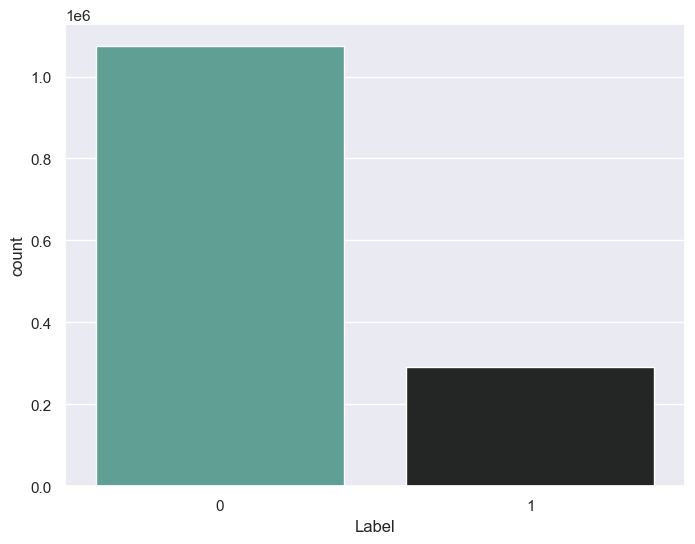

In [18]:
print(df_dataset["Label"].value_counts()[[0]].sum())
print(df_dataset["Label"].value_counts()[[1]].sum())

print(df_dataset.shape)

sns.set(rc={'figure.figsize':(8, 6)}
        )
sns.countplot(x=df_dataset[df_dataset.columns[-1]], 
              data = df_dataset,
              palette = 'dark:#5A9_r',
              legend = "full")

### Saving the Dataset as a csv file

In [19]:
df_dataset.to_csv("processed_dataset.csv", index=False)

## Data Exploratory - Columns

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading processed dataset to a dataframe

In [21]:
df_dataset = pd.read_csv("processed_dataset.csv")
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [22]:
df_dataset.describe()

d:\_Jaime\02 UPTP\_CLASES\06 SEXTO SEMESTRE\07 CAPSOTNE\07 Code\MJCapstone\.venv\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\_Jaime\02 UPTP\_CLASES\06 SEXTO SEMESTRE\07 CAPSOTNE\07 Code\MJCapstone\.venv\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,...,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06,1.364018e+06
mean,1.070221e+07,6.071589e+00,6.488583e+00,6.097549e+02,4.197069e+03,4.696537e+02,4.713910e+00,1.034339e+02,1.995223e+02,3.936288e+02,...,2.368494e+01,9.465298e+04,4.715106e+04,1.466126e+05,6.396082e+04,4.267918e+06,8.186222e+04,4.331441e+06,4.187792e+06,2.126724e-01
std,2.678208e+07,7.805017e+01,1.867188e+02,1.902377e+03,2.708301e+05,3.922937e+02,1.661129e+01,7.652449e+01,1.731760e+02,4.337639e+02,...,8.298769e+00,1.827215e+06,1.106574e+06,2.422639e+06,1.543415e+06,1.608869e+07,1.283400e+06,1.621981e+07,1.601958e+07,4.091980e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.157225e+04,3.000000e+00,1.000000e+00,4.500000e+01,1.020000e+02,3.900000e+01,0.000000e+00,3.200000e+01,0.000000e+00,9.200000e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.857088e+06,5.000000e+00,3.000000e+00,5.080000e+02,3.210000e+02,3.480000e+02,0.000000e+00,1.086667e+02,1.882162e+02,3.130000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.406077e+06,5.000000e+00,4.000000e+00,9.350000e+02,4.880000e+02,9.350000e+02,0.000000e+00,1.870000e+02,4.181447e+02,3.850000e+02,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.010000e+08,2.912000e+03,1.460000e+03,1.460000e+03,1.032376e+03,8.688000e+03,...,4.400000e+01,1.110000e+08,7.490000e+07,1.110000e+08,1.110000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08,1.000000e+00


In [23]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364018 entries, 0 to 1364017
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1364018 non-null  int64  
 1   Tot Fwd Pkts       1364018 non-null  int64  
 2   Tot Bwd Pkts       1364018 non-null  int64  
 3   TotLen Fwd Pkts    1364018 non-null  int64  
 4   TotLen Bwd Pkts    1364018 non-null  float64
 5   Fwd Pkt Len Max    1364018 non-null  int64  
 6   Fwd Pkt Len Min    1364018 non-null  int64  
 7   Fwd Pkt Len Mean   1364018 non-null  float64
 8   Fwd Pkt Len Std    1364018 non-null  float64
 9   Bwd Pkt Len Max    1364018 non-null  int64  
 10  Bwd Pkt Len Min    1364018 non-null  int64  
 11  Bwd Pkt Len Mean   1364018 non-null  float64
 12  Bwd Pkt Len Std    1364018 non-null  float64
 13  Flow Byts/s        1364018 non-null  float64
 14  Flow Pkts/s        1364018 non-null  float64
 15  Flow IAT Mean      1364018 non-n

In [24]:
for position, type in enumerate(df_dataset.dtypes):
    # print(type)
    # print(position)
    # df_dataset[df_dataset.columns[position]].astype(type)
    df_dataset = df_dataset.astype({df_dataset.columns[position]:type})
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [25]:
df_dataset.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
   

<Axes: >

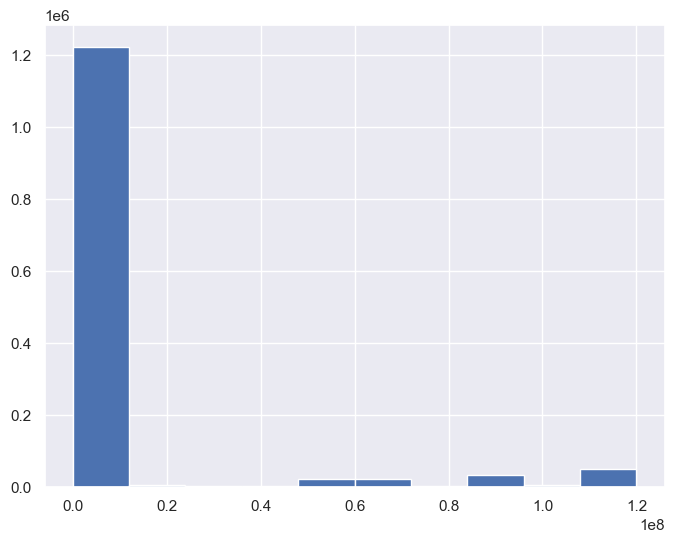

In [26]:
# plt.figure()
# plt.
# df_dataset.hist()
df_dataset[df_dataset.columns[0]].hist()
# df_dataset[df_dataset.columns[1]].hist()


In [27]:
print(df_dataset.columns[0])
df_dataset[df_dataset.columns[0]].describe()

Flow Duration


count    1.364018e+06
mean     1.070221e+07
std      2.678208e+07
min      0.000000e+00
25%      2.157225e+04
50%      2.857088e+06
75%      4.406077e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64

In [28]:
df_dataset[df_dataset.columns[0]].unique()


array([ 141385,     281,  279824, ..., 4122212, 4122731, 5270974],
      dtype=int64)

### Ploting columns

[   0.    0.    0. ... 1460. 1460. 1460.]


<Axes: ylabel='Frequency'>

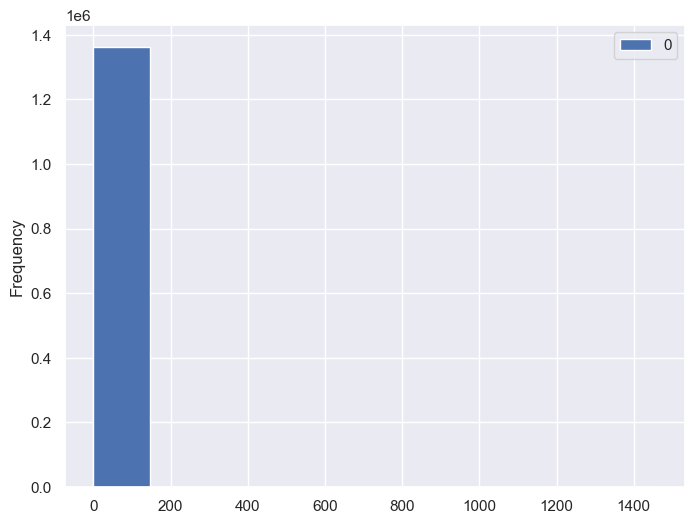

In [29]:
# plt.pyplot.plot(df_dataset[df_dataset.columns[1]], df_dataset[df_dataset.columns[-1]])
print(np.sort(df_dataset[df_dataset.columns[7]]))
pd.DataFrame(np.sort(df_dataset[df_dataset.columns[6]])).plot(kind='hist')
# df_dataset[df_dataset.columns[1]].unique()
# df_dataset[df_dataset.columns[1]].hist()
# df_dataset[df_dataset.columns[1]].count()
# df_dataset[df_dataset.columns[1]]


## Decision Tree

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

# Model
from sklearn.tree import DecisionTreeClassifier


# For reproducible results
RANDOM_STATE_SEED = 420

In [31]:
df_dataset = pd.read_csv("processed_dataset.csv")
df_dataset


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [32]:
print(np.any(np.isnan(df_dataset)))
print(np.any(np.isfinite(df_dataset)))

False
True


In [33]:
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_dataset[df_dataset.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df_dataset.dropna(inplace=True)

In [34]:
# pd.DataFrame(np.where(np.isfinite(df_dataset)))

In [37]:
print(np.any(np.isnan(df_dataset)))
print(np.any(np.isfinite(df_dataset)))

False
True


In [38]:
# print(df_dataset[:,0].shape)
# index = 0
# for i in df_dataset[:,0]:
#     if not np.isfinite(i):
#         print(index, i)
#     index +=1

In [39]:
X = np.array(df_dataset)
X

array([[1.41385000e+05, 9.00000000e+00, 7.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.81000000e+02, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79824000e+05, 1.10000000e+01, 1.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12640543e+08, 3.00000000e+00, 0.00000000e+00, ...,
        5.63000000e+07, 5.63000000e+07, 0.00000000e+00],
       [4.10000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.60000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [40]:
y = np.array(df_dataset.pop('Label'))
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [53]:
# print(df_X.shape)
# print(df_y.shape)

In [54]:
# train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=RANDOM_STATE_SEED)

In [55]:
print(df_dataset.shape)
print("TRAIN:")
print(X_train.shape)
print(y_train.shape)

print("TEST")
print(X_test.shape)
print(y_test.shape)

(1363855, 76)
TRAIN:
(913782, 77)
(913782,)
TEST
(450073, 77)
(450073,)


In [56]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [57]:
hyperparameters = {
    'max_depth': [i for i in range(1, 20)]
}

In [58]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [59]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [60]:
# print(np.any(np.isnan(X_train)))
# print(np.any(np.isfinite(X_train)))


In [61]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

1.0
---------------
Best performing hyperparameters on Validation set: 
{'max_depth': 1}
---------------
DecisionTreeClassifier(max_depth=1)


In [62]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=1)

In [63]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [65]:
print(accuracy_score(y_test, predictions))

1.0


In [66]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[354551      0]
 [     0  95522]]


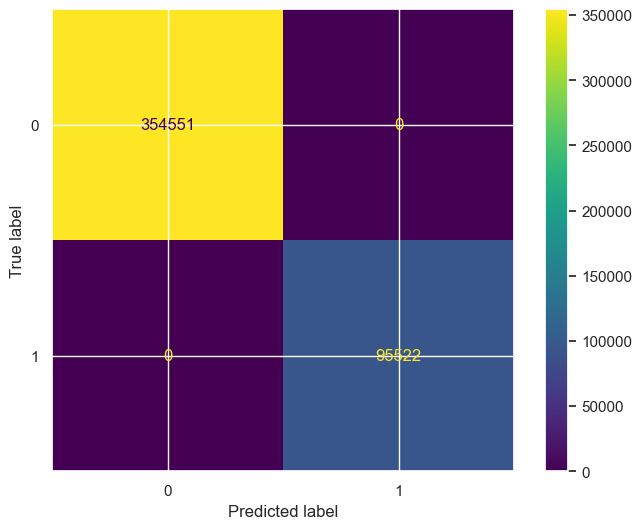

In [67]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test)

In [68]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.
